<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import pandas as pd
import tweepy
import re 
import regex
import emoji
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from textblob import TextBlob 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
api_key = "N1-Cr3a-Qu3-lE-D3jar3-La5"
api_secret_key ="Cr3D3nc1al3s-"
access_token = "Y-Much0-m3N0s-L0s-C0d1G0s"
access_token_secret = "D3-Acc355O"

In [3]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [15]:
tweets = tweepy.Cursor(api.search,
                       q=['#Angular -RT'],
                       lang='en',
                       # geocode='4.7110,-74.0721,100km', #Filtra por localizacion 
                       tweet_mode='extended',# Para que llegue el texto completo
                       include_rts=False, # Para evitar que sea re tuits
                       ).items(100)

# Convirte la informacion en una lista
tuits = [tweet for tweet in tweets]

In [16]:
tweet = []

for tuit in tuits: 
    temp = []
    temp.append(tuit.full_text)
    temp.append(tuit.created_at)
    temp.append(tuit.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tuit.id}")
    
    tweet.append(temp)
    
    
data = pd.DataFrame(tweet)
data.columns = ['tweets', 'date', 'id', 'link']
data.head()

,tweets,date,id,link
0,[4+1 ways] How to Unsubscribe from Observables...,2021-05-27 00:12:00,1397707120368394240,https://twitter.com/i/web/stuatus/139770712036...
1,I can perfectly handle your Essays &amp; cours...,2021-05-27 00:07:53,1397706086400987137,https://twitter.com/i/web/stuatus/139770608640...
2,Serverless React with AWS Amplify - The Comple...,2021-05-27 00:00:00,1397704102499348482,https://twitter.com/i/web/stuatus/139770410249...
3,@StackOverflow Favorite #WEB framework:\n\n😎 #...,2021-05-26 23:51:32,1397701968534114306,https://twitter.com/i/web/stuatus/139770196853...
4,#FEATURED #COURSES\n\nAngular &amp; NodeJS - T...,2021-05-26 23:50:53,1397701806076006405,https://twitter.com/i/web/stuatus/139770180607...


In [17]:
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions

# Funcion que obtiene los emojis en el texto
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

In [18]:
#Obtiene el texto limpio, acortamos la url, obtenemos los hashtags y las cuentas mencionadas
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
#Obtener Emojis
data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data

,tweets,date,id,link,texto_limpio,links,hashtags,mentions,emojis
0,[4+1 ways] How to Unsubscribe from Observables...,2021-05-27 00:12:00,1397707120368394240,https://twitter.com/i/web/stuatus/139770712036...,[4+1 ways] How to Unsubscribe from Observables...,[https://t.co/9SJ4U2Jw65],"[#Angular, #typescript, #frontend, #webdev, #d...",[],[😎]
1,I can perfectly handle your Essays &amp; cours...,2021-05-27 00:07:53,1397706086400987137,https://twitter.com/i/web/stuatus/139770608640...,I can perfectly handle your Essays &amp; cours...,[],"[#Assignment, #quiz, #Math, #JavaScript, #Prog...",[],[]
2,Serverless React with AWS Amplify - The Comple...,2021-05-27 00:00:00,1397704102499348482,https://twitter.com/i/web/stuatus/139770410249...,Serverless React with AWS Amplify - The Comple...,[https://t.co/hGAr2niPFi],"[#100DaysOfCode, #webdevelopment, #javascript,...",[],[]
3,@StackOverflow Favorite #WEB framework:\n\n😎 #...,2021-05-26 23:51:32,1397701968534114306,https://twitter.com/i/web/stuatus/139770196853...,Favorite framework:\n\n😎 \n🎉 \n💯 \n\n🤮,[https://t.co/5Bc4Kd99bd],"[#WEB, #vue, #react, #Bootstrap, #angular]",[@StackOverflow],"[😎, 🎉, 💯, 🤮]"
4,#FEATURED #COURSES\n\nAngular &amp; NodeJS - T...,2021-05-26 23:50:53,1397701806076006405,https://twitter.com/i/web/stuatus/139770180607...,\n\nAngular &amp; NodeJS - The MEAN Stack Gui...,"[https://t.co/iIHj03zF7i, https://t.co/QqzXyCG...","[#FEATURED, #COURSES, #Angular, #Frontend, #No...",[],[]
...,...,...,...,...,...,...,...,...,...
95,#NowHiring - Software Engineers! If you are ex...,2021-05-26 14:38:51,1397562883437912065,https://twitter.com/i/web/stuatus/139756288343...,- Software Engineers! If you are experienced ...,"[https://t.co/3moV5fPqzE, https://t.co/DXoqnvd...","[#NowHiring, #cloud,, #python,, #java,, #angul...",[],[]
96,This eBook https://t.co/rkNMcJuqft discusses e...,2021-05-26 14:37:33,1397562557951619080,https://twitter.com/i/web/stuatus/139756255795...,This eBook discusses every aspect of which m...,[https://t.co/rkNMcJuqft],"[#Angular,]",[],"[✅, ✅]"
97,#Angular comes with ultra-modern features that...,2021-05-26 14:36:33,1397562305819328527,https://twitter.com/i/web/stuatus/139756230581...,comes with ultra-modern features that can tra...,[],"[#Angular, #application.]",[],[]
98,There are some downsides of #Angular like Comp...,2021-05-26 14:33:33,1397561550974726148,https://twitter.com/i/web/stuatus/139756155097...,"There are some downsides of like Complexity, ...",[],[#Angular],[],[]


###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [23]:
data['sentimiento_vader'] = data['tweets'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['tweets'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()

,tweets,date,id,link,texto_limpio,links,hashtags,mentions,emojis,sentimiento_vader,sentimiento_textblob
0,[4+1 ways] How to Unsubscribe from Observables...,2021-05-27 00:12:00,1397707120368394240,https://twitter.com/i/web/stuatus/139770712036...,[4+1 ways] How to Unsubscribe from Observables...,[https://t.co/9SJ4U2Jw65],"[#Angular, #typescript, #frontend, #webdev, #d...",[],[😎],0.6705,0.00000
1,I can perfectly handle your Essays &amp; cours...,2021-05-27 00:07:53,1397706086400987137,https://twitter.com/i/web/stuatus/139770608640...,I can perfectly handle your Essays &amp; cours...,[],"[#Assignment, #quiz, #Math, #JavaScript, #Prog...",[],[],0.6369,1.00000
2,Serverless React with AWS Amplify - The Comple...,2021-05-27 00:00:00,1397704102499348482,https://twitter.com/i/web/stuatus/139770410249...,Serverless React with AWS Amplify - The Comple...,[https://t.co/hGAr2niPFi],"[#100DaysOfCode, #webdevelopment, #javascript,...",[],[],0.0000,0.10000
3,@StackOverflow Favorite #WEB framework:\n\n😎 #...,2021-05-26 23:51:32,1397701968534114306,https://twitter.com/i/web/stuatus/139770196853...,Favorite framework:\n\n😎 \n🎉 \n💯 \n\n🤮,[https://t.co/5Bc4Kd99bd],"[#WEB, #vue, #react, #Bootstrap, #angular]",[@StackOverflow],"[😎, 🎉, 💯, 🤮]",0.8271,0.50000
4,#FEATURED #COURSES\n\nAngular &amp; NodeJS - T...,2021-05-26 23:50:53,1397701806076006405,https://twitter.com/i/web/stuatus/139770180607...,\n\nAngular &amp; NodeJS - The MEAN Stack Gui...,"[https://t.co/iIHj03zF7i, https://t.co/QqzXyCG...","[#FEATURED, #COURSES, #Angular, #Frontend, #No...",[],[],0.0000,-0.05625


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [98]:
print(f"El tweet negativo de vader es: \n {data[['tweets', 'sentimiento_vader']].sort_values('sentimiento_vader')[:2:]}")
print("\n")
print(f"El tweet positivo de vader es: \n {data[['tweets', 'sentimiento_vader']].sort_values('sentimiento_vader')[::-1]}")

El tweet negativo de vader es: 
                                                tweets  sentimiento_vader
22  🔥🔥🔥 Hey Angular Developers: There's an excitin...            -0.8772
98  There are some downsides of #Angular like Comp...            -0.6300


El tweet positivo de vader es: 
                                                tweets  sentimiento_vader
29  Today @AthensAngular together with @AngularDut...             0.9612
8   We're hiring a number of contract &amp; remote...             0.9134
61  My friends said I should promote myself more, ...             0.9081
93  Fun fact for my future self:\nI've spent the l...             0.9052
77  Join this talk to make your #Angular applicati...             0.8883
..                                                ...                ...
53  🔥 New Angular Release 🚀\n  \n📦 12.1.0-next.3 \...            -0.3400
45  🔥 New Angular CLI Release 🚀\n  \n📦 v12.1.0-nex...            -0.3400
94  Does anyone know of a chrome extension that re...   

In [105]:
print(f"El tweet negativo de textblob es: \n {data[['tweets', 'sentimiento_textblob']].sort_values('sentimiento_textblob')[:1:]}")
print("\n")
print(f"El tweet positivo de textblob es: \n {data[['tweets', 'sentimiento_textblob']].sort_values('sentimiento_textblob')[::-1]}")

El tweet negativo de textblob es: 
                                                tweets  sentimiento_textblob
98  There are some downsides of #Angular like Comp...             -0.295312


El tweet positivo de textblob es: 
                                                tweets  sentimiento_textblob
9   Hi  @joshuamorony congrats on the launch of yo...              1.000000
30  Hey, I can perfectly handle your Essays &amp; ...              1.000000
6   Hey, I can perfectly handle your Essays &amp; ...              1.000000
1   I can perfectly handle your Essays &amp; cours...              1.000000
21  Found a great resource on #Angular - \nExample...              0.800000
..                                                ...                   ...
86  #Frontend #Developer #Angular for a permanent ...             -0.100000
31  Looking forward to collaborating with like min...             -0.100000
79  Check out my Gig on Fiverr: develop profession...             -0.106250
82  Fullstack 

###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [122]:
print(f"Total Tweets Vader Positivo: {data.sentimiento_vader[data.sentimiento_vader > 0].size}")
print(f"Total Tweets Vader Negativo: {data.sentimiento_vader[data.sentimiento_vader <= 0].size}")

Total Tweets vader Positivo: 53
Total Tweets vader Negativo: 47


In [123]:
print(f"Total Tweet Textblob Positivo: {data.sentimiento_textblob[data.sentimiento_textblob > 0].size}")
print(f"Total Tweet Textblob Negativo: {data.sentimiento_textblob[data.sentimiento_textblob <= 0].size}")

Total Tweet Textblob Positivo: 54
Total Tweet Textblob Negativo: 46


###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

In [134]:
names = ['Vader Positivo', 'Textblob Positivo','Vader Negativo', 'Textblob Negativo']
values = [
            data.sentimiento_vader[data.sentimiento_vader > 0].size,
            data.sentimiento_textblob[data.sentimiento_textblob > 0].size,
            data.sentimiento_vader[data.sentimiento_vader <= 0].size,
            data.sentimiento_textblob[data.sentimiento_textblob <= 0].size
          ]

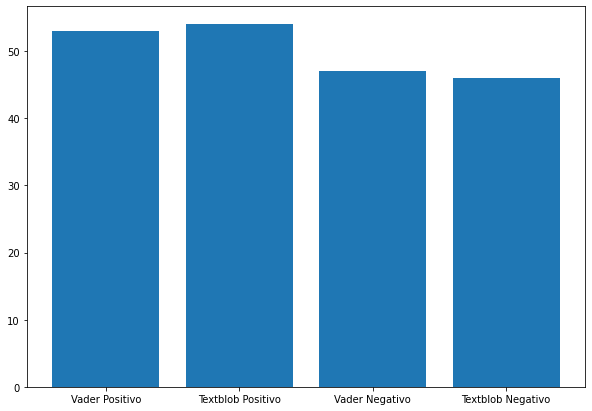

In [149]:
plt.figure(figsize=(10,7))
plt.bar(names, values)
plt.show()

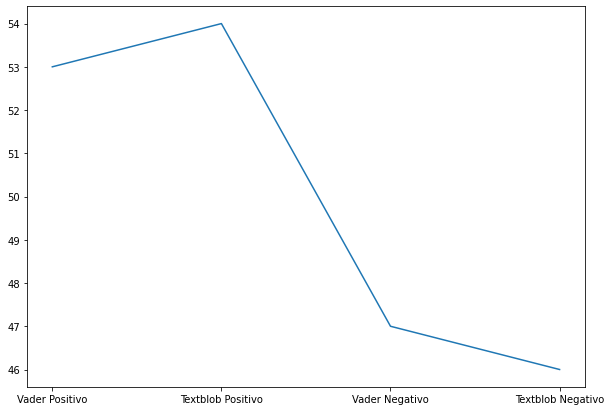

In [147]:
plt.figure(figsize=(10,7))
plt.plot(names, values)
plt.show()

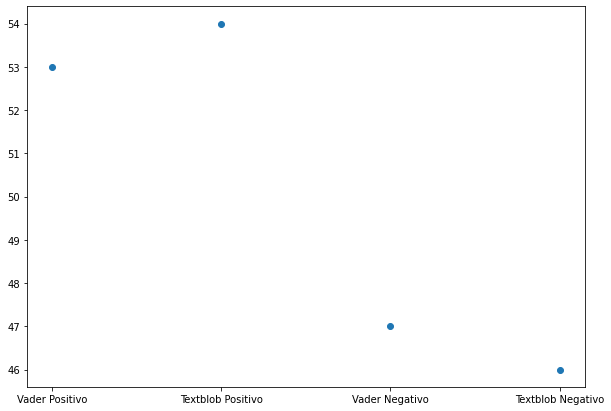

In [146]:
plt.figure(figsize=(10,7))
plt.scatter(names, values)
plt.show()